# Q1

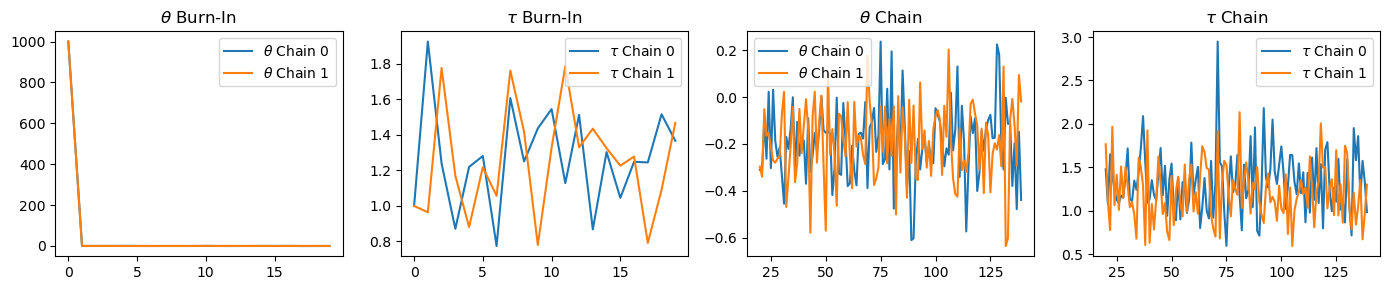

Posterior mean of theta (chain 0): -0.18912050041111664
Posterior mean of tau (chain 0):   1.238149201803083
Posterior mean of sigma (chain 0): 0.8986974491405878


In [4]:
        import numpy as np
        import scipy.stats as stats
        import matplotlib.pyplot as plt

        # Example parameters for data generation:
        n = 30        # sample size
        m = 0.0       # true mean for data generation
        s = 1.0       # true standard deviation for data generation
        np.random.seed(42)

        # Generate data from Normal(loc=m, scale=s)
        x = stats.norm(loc=m, scale=s).rvs(size=n)
        
        # Number of chains, number of Gibbs iterations
        C, G = 2, 10_000
        
        # Arrays to store samples: each chain is a row, each iteration a column
        theta = np.zeros((C, G))
        tau   = np.zeros((C, G))

        # Initializations (could also randomize, but here we set them for simplicity)
        theta[:, 0] = 1000.0  # a large or arbitrary initial guess
        tau[:, 0]   = 1.0     # initial guess for precision

        # Precompute some useful values
        x_bar = np.mean(x)
        
        # Gibbs sampling
        for c in range(C):
            for g in range(1, G):
                # 1) Sample theta from Normal with mean=x_bar, var=1/(n * tau_current)
                tau_current = tau[c, g-1]
                
                var_theta   = 1.0 / (n * tau_current)
                mean_theta  = x_bar  # for a flat prior, posterior mean = sample mean
                theta[c, g] = np.random.normal(mean_theta, np.sqrt(var_theta))
                
                # 2) Sample tau from Gamma(shape=n/2, rate=sum_of_squares/2)
                sum_sq = np.sum((x - theta[c, g])**2)
                shape_param = n / 2.0
                rate_param  = sum_sq / 2.0
                # in scipy: gamma(a=shape, scale=1/rate)
                tau[c, g] = stats.gamma(a=shape_param, scale=1.0/rate_param).rvs()

        # Plot the burn-in and some of the chain for demonstration
        fig, ax = plt.subplots(1, 4, figsize=(14, 3))
        ax[0].set_title(r'$\theta$ Burn-In')
        ax[1].set_title(r'$\tau$ Burn-In')
        ax[2].set_title(r'$\theta$ Chain')
        ax[3].set_title(r'$\tau$ Chain')

        burn = 20    # burn-in length
        demo = 120   # how many samples to show post burn-in

        for c in range(C):
            ax[0].plot(theta[c, :burn], label=r'$\theta$ Chain ' + str(c))
            ax[1].plot(tau[c, :burn],   label=r'$\tau$ Chain ' + str(c))
            ax[2].plot(np.arange(burn, burn+demo), theta[c, burn:burn+demo],
                       label=r'$\theta$ Chain ' + str(c))
            ax[3].plot(np.arange(burn, burn+demo), tau[c, burn:burn+demo],
                       label=r'$\tau$ Chain ' + str(c))

        for i in range(4):
            ax[i].legend()

        plt.tight_layout()
        plt.show()

        # Posterior summaries (for chain 0, for instance)
        # Discard burn-in, combine or look at each chain separately
        post_theta_chain0 = theta[0, burn:]
        post_tau_chain0   = tau[0, burn:]
        
        # Posterior means
        print("Posterior mean of theta (chain 0):", np.mean(post_theta_chain0))
        print("Posterior mean of tau (chain 0):  ", np.mean(post_tau_chain0))
        print("Posterior mean of sigma (chain 0):", 1.0 / np.sqrt(np.mean(post_tau_chain0)))


# Q2

  ## Model Setup

- **Prior for \(\theta\):**  
  $
    \theta \sim \mathcal{N}\bigl(\theta_0,\, \tau_0^2\bigr).
  $

- **Prior for \(\tau\):**  
  $
    \tau \;\propto\;\tau^{\tfrac{\alpha}{2}-1} \exp\!\Bigl(-\tfrac{\lambda}{2}\,\tau\Bigr)
    \quad\bigl(\text{Gamma prior with shape } \tfrac{\alpha}{2}
    \text{ and rate } \tfrac{\lambda}{2}\bigr).
  $

- **Likelihood:**  
  $
    x_i \,\bigm|\,(\theta,\tau)
    \;\sim\;
    \mathcal{N}\!\bigl(\theta,\; 1/\tau\bigr),
    \quad i = 1,\ldots,n.
  $

---

## Full Conditional for \(\tau\)

We aim to derive the posterior distribution for \(\tau\) given \(\theta\) and the data \(\mathbf{x} = (x_1,\ldots,x_n)\). By Bayes' theorem,

$
  p\bigl(\tau \mid \theta, \mathbf{x}\bigr)
  \;\propto\;
  p\bigl(\mathbf{x} \mid \theta, \tau\bigr)\,p(\tau).
$

Here,

$
  p\bigl(\mathbf{x} \mid \theta, \tau\bigr)
  \;=\;\prod_{i=1}^n \sqrt{\tfrac{\tau}{2\pi}}
  \,\exp\!\Bigl(-\tfrac{\tau}{2}(x_i - \theta)^2\Bigr),
  \quad
  p(\tau) \;\propto\;
  \tau^{\tfrac{\alpha}{2}-1}\,\exp\!\Bigl(-\tfrac{\lambda}{2}\,\tau\Bigr).
$

Combining and simplifying yields a Gamma form in \(\tau\). Specifically,

$
  p\bigl(\tau \mid \theta,\mathbf{x}\bigr)
  \;\propto\;
  \tau^{\tfrac{n}{2}}
  \exp\!\Bigl(-\tfrac{\tau}{2}\sum_{i=1}^n (x_i-\theta)^2\Bigr)
  \;\times\;
  \tau^{\tfrac{\alpha}{2}-1}
  \exp\!\Bigl(-\tfrac{\lambda}{2}\,\tau\Bigr)
  \;=\;
  \tau^{\bigl(\tfrac{n+\alpha}{2}-1\bigr)}
  \exp\!\Bigl(
    -\tfrac{1}{2}\bigl[\lambda + \sum_{i=1}^n(x_i-\theta)^2\bigr]\tau
  \Bigr).
$

Hence,

$
  \tau \;\bigm|\;(\theta,\mathbf{x})
  \;\sim\;
  \text{Gamma}\!\Bigl(
    \tfrac{n+\alpha}{2},\;
    \tfrac{\lambda + \sum_{i=1}^n (x_i-\theta)^2}{2}
  \Bigr).
$


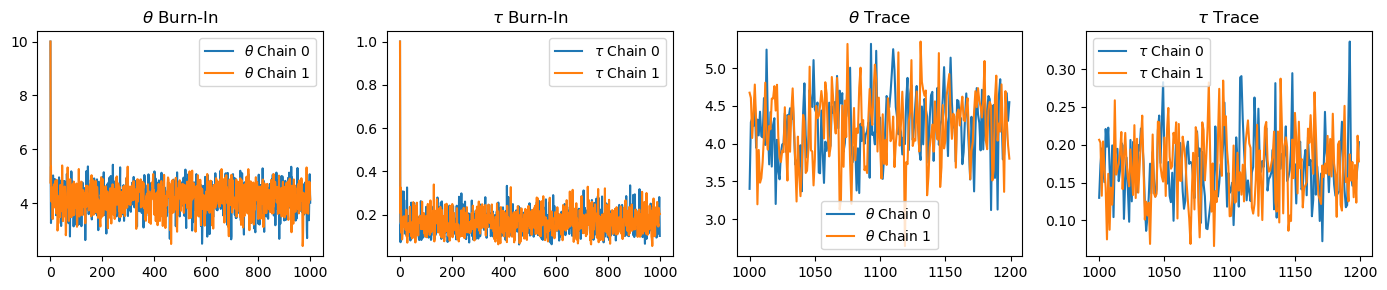

Posterior mean of theta (chain 0): 4.203593457045063
Posterior mean of tau (chain 0):   0.1687885787225092
Posterior mean of sigma (chain 0): 2.434044264609593


In [3]:
        import numpy as np
        import scipy.stats as stats
        import matplotlib.pyplot as plt

        # For demonstration, we generate synthetic data 
        # x ~ Normal(loc=m, scale=s) for arbitrary n, m, s
        np.random.seed(123)
        n = 30
        m = 5.0
        s = 2.0
        x = stats.norm(loc=m, scale=s).rvs(size=n)

        # Set the new prior hyperparameters
        theta0   = 0.0      # prior mean for theta
        tau0_sq  = 1.0      # prior variance for theta
        alpha    = 2.0      # shape * 2 
        lambd    = 2.0      # rate * 2

        # Gibbs settings
        C = 2      # number of chains
        G = 5000   # number of iterations per chain

        # Arrays to store draws
        theta = np.zeros((C, G))
        tau   = np.zeros((C, G))

        # Initialize
        theta[:, 0] = 10.0  # some initial guess
        tau[:, 0]   = 1.0   # some initial guess

        # Precompute helpful stats
        x_bar = np.mean(x)

        for c in range(C):
            for g in range(1, G):
                # --- Sample theta given tau ---
                tau_current = tau[c, g-1]
                var_theta = 1.0 / (n * tau_current + 1.0/tau0_sq)
                mean_theta = var_theta * (n * tau_current * x_bar + theta0 / tau0_sq)
                theta[c, g] = np.random.normal(mean_theta, np.sqrt(var_theta))

                # --- Sample tau given theta ---
                theta_current = theta[c, g]
                sum_sq = np.sum((x - theta_current)**2)
                shape_param = 0.5 * (n + alpha)
                rate_param  = 0.5 * (lambd + sum_sq)
                tau[c, g] = stats.gamma(a=shape_param, scale=1.0/rate_param).rvs()

        # Visualization: trace plots for burn-in and sample
        fig, ax = plt.subplots(1, 4, figsize=(14, 3))
        ax[0].set_title(r'$\theta$ Burn-In')
        ax[1].set_title(r'$\tau$ Burn-In')
        ax[2].set_title(r'$\theta$ Trace')
        ax[3].set_title(r'$\tau$ Trace')

        burn = 1000
        demo = 200

        for c in range(C):
            ax[0].plot(theta[c, :burn], label=r'$\theta$ Chain {}'.format(c))
            ax[1].plot(tau[c, :burn],   label=r'$\tau$ Chain {}'.format(c))
            ax[2].plot(np.arange(burn, burn+demo), theta[c, burn:burn+demo],
                       label=r'$\theta$ Chain {}'.format(c))
            ax[3].plot(np.arange(burn, burn+demo), tau[c, burn:burn+demo],
                       label=r'$\tau$ Chain {}'.format(c))

        for i in range(4):
            ax[i].legend()
        plt.tight_layout()
        plt.show()

        # Posterior summary (chain 0 for example):
        theta_chain0 = theta[0, burn:]
        tau_chain0   = tau[0, burn:]
        post_mean_theta = np.mean(theta_chain0)
        post_mean_tau   = np.mean(tau_chain0)
        post_mean_sigma = 1.0 / np.sqrt(post_mean_tau)

        print("Posterior mean of theta (chain 0):", post_mean_theta)
        print("Posterior mean of tau (chain 0):  ", post_mean_tau)
        print("Posterior mean of sigma (chain 0):", post_mean_sigma)

# Q3

## Q3

**The Beta-Binomial model** is a special case of Bayesian inference for Bernoulli data with a Beta prior. The observed data are:
$
  x_1, x_2, \ldots, x_n \;\;\stackrel{\text{iid}}{\sim}\; \mathrm{Bernoulli}(\theta),
$
and the prior distribution is:
$
  \theta \;\sim\; \mathrm{Beta}(a, b).
$

---

### Goal

Our objective is to derive the posterior distribution $p(\theta \mid x)\), where \(x = (x_1,\dots,x_n)$.

---

### From Bayes' Theorem

$
p(\theta \mid x)
\;\propto\;
p(x \mid \theta)\;p(\theta).
$

Here,
- $p(x \mid \theta)$ is the joint likelihood of the Bernoulli observations,
- $p(\theta)$ is the Beta prior.

---

### Bernoulli Likelihood

Because each $x_i \in \{0,1\}$ and follows $\mathrm{Bernoulli}(\theta)$, the joint likelihood for $n$ observations is:
$
  p(x \mid \theta)
  \;=\;
  \prod_{i=1}^n
    \theta^{\,x_i}\,\bigl(1 - \theta\bigr)^{\,1 - x_i}.
$
If we let \(S = \sum_{i=1}^n x_i\), this simplifies to:
$
  p(x \mid \theta)
  \;\propto\;
  \theta^S \,\bigl(1 - \theta\bigr)^{\,n-S}.
$

---

### Beta Prior

A $\mathrm{Beta}(a,b)$ prior for $\theta$ (in unnormalized form) can be written:
$
  p(\theta)
  \;\propto\;
  \theta^{\,a - 1}\,\bigl(1 - \theta\bigr)^{\,b - 1}.
$

---

### Combine the Powers of $\theta$

The joint distribution (unnormalized) becomes:
$
  p(x,\theta)
  \;\propto\;
  p(x \mid \theta)\;p(\theta)
  \;\propto\;
  \theta^S \,\bigl(1-\theta\bigr)^{\,n-S}
  \;\times\;
  \theta^{\,a - 1}\,\bigl(1-\theta\bigr)^{\,b - 1}.
$
Collecting exponents of $\theta$ and $(1-\theta)$:
$
  p(x,\theta)
  \;\propto\;
  \theta^{\,\bigl(S + a - 1\bigr)}
  \,\bigl(1-\theta\bigr)^{\,\bigl((n - S) + (b - 1)\bigr)}
  \;=\;
  \theta^{\,(S + a - 1)} \,\bigl(1-\theta\bigr)^{\,\bigl(n - S + b - 1\bigr)}.
$

---

### Posterior Distribution

By inspection, this has the functional form of a $\mathrm{Beta}$ distribution in $\theta$. Therefore,
$
  p(\theta \mid x)
  \;\propto\;
  \theta^{\,S + a - 1} \,\bigl(1 - \theta\bigr)^{\,n - S + b - 1}.
$
Recognizing the standard Beta form, the normalized posterior is:
$
  \theta \;\bigm|\; x
  \;\sim\;
  \mathrm{Beta}\Bigl(a + \textstyle\sum_i x_i,\; b + n - \sum_i x_i\Bigr).
$

Hence, the **posterior distribution** for $\theta$, given $n$ Bernoulli trials yielding $\sum x_i = S$ successes, is a Beta distribution with updated parameters $\bigl(a + S,\; b + (n - S)\bigr)$.
